<a href="https://colab.research.google.com/github/vishnupm-22/Credit_Card_Fraud_Detection/blob/main/Big_mart_salesPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing** **the** **Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


# **Data Collection and Analysis**


In [ ]:
# loading the dataset
big_mart = pd.read_csv('/content/Train.csv')

In [ ]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Item_Outlet_Sales is target variable

In [ ]:
# number of datapoints and no of features
big_mart.shape

(8523, 12)

In [ ]:
# getting some info about the data set
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size  
- Outlet_Size               
-  Outlet_Location_Type       
-  Outlet_Type

**Checking for missing values**

In [ ]:
# Checking for missing values
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Handling missing values**

Mean----> average value
Mode ------>Most repeated value

***Item_Weight colm*** **: replacing missing values with mean**

In [ ]:
# mean value of Item_Weight colm

In [ ]:
big_mart['Item_Weight'].mean()

12.857645184135976

In [ ]:
# filling the missing values in item_weight colm with mean
big_mart['Item_Weight'].fillna(big_mart['Item_Weight'].mean(),inplace=True)


In [ ]:
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Replacing the missing values in Outlet_size colm with mode**

In [ ]:
# mode of "Outlet_Size" column
big_mart['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [ ]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
# we cannot take mode of an entire colums ,instead of that we compare with the outlet_type

In [ ]:
miss_values = big_mart['Outlet_Size'].isnull()

In [ ]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
big_mart.loc[miss_values, 'Outlet_Size'] = big_mart.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
big_mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# **Data Analysis**


In [ ]:
big_mart.describe()
# statistical measures about the data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Numerical** **Features**

In [ ]:
sns.set()  # gives theme for our plots

**item_weight distribution** **: dist plot **

In [ ]:
# item_weight distribution

In [ ]:
plt.figure(figsize=(6,6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<ipython-input-27-464bd3f90bf8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

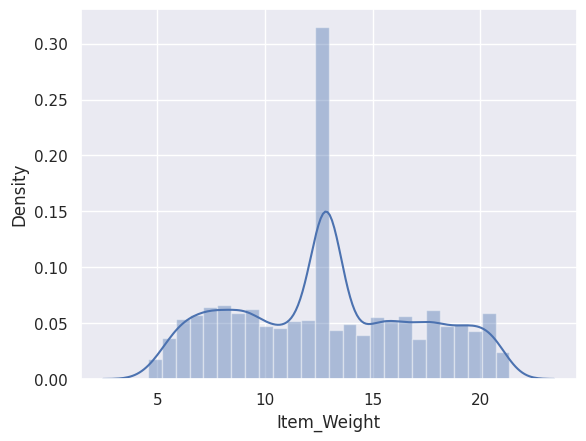

In [ ]:
sns.distplot(big_mart['Item_Weight'])

**Item_Visibility distribution : dist plot**

<ipython-input-28-16911e043a5f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['Item_Visibility'])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

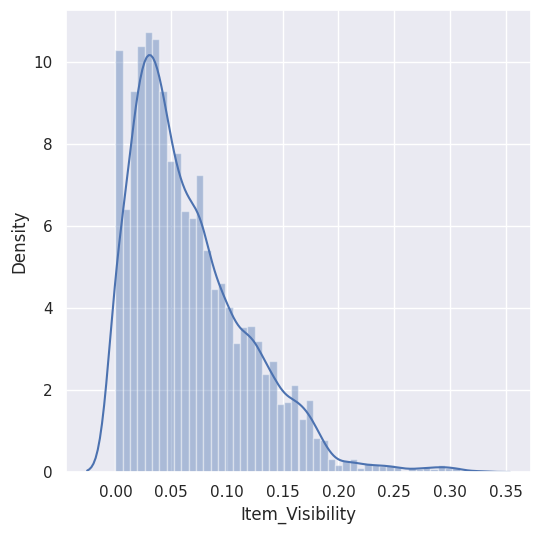

In [ ]:
# Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_Visibility'])

# distributed on one side

**item_MRP distriution : dist plot**

<ipython-input-29-2c1a9ae8fc9a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

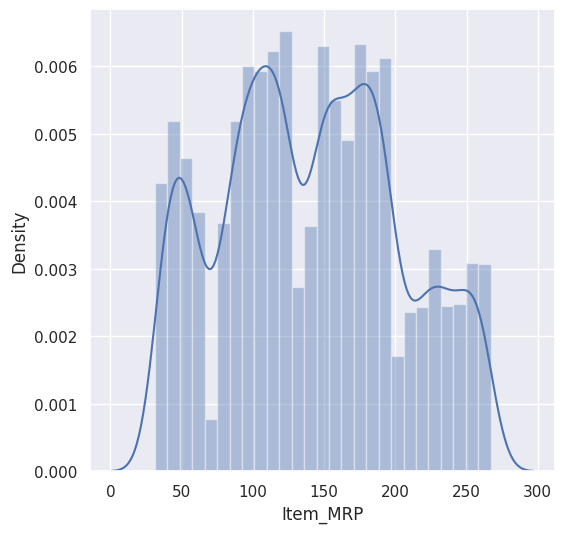

In [ ]:
# item_MRP

plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_MRP'])

**Item_Outlet_Sales distribution : dist plot**

<ipython-input-30-093845422976>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

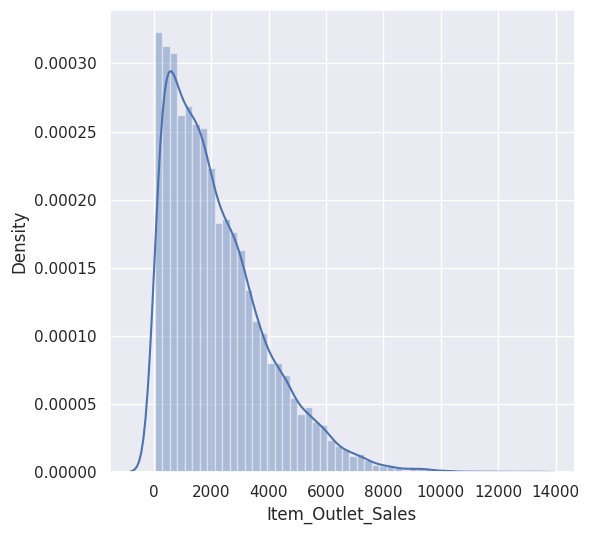

In [ ]:

# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart['Item_Outlet_Sales'])

**Outlet Establishment year : Count Plot**


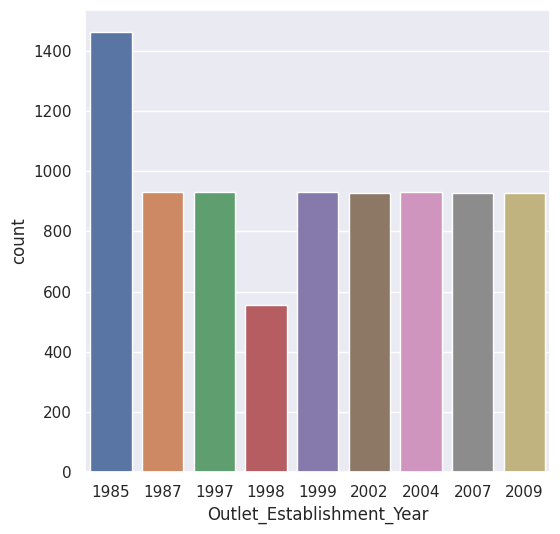

In [ ]:
# Outlet Establishment yeasr
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart)
plt.show()

**Outlet_Establishment_Year : Bar Plot**

<Axes: >

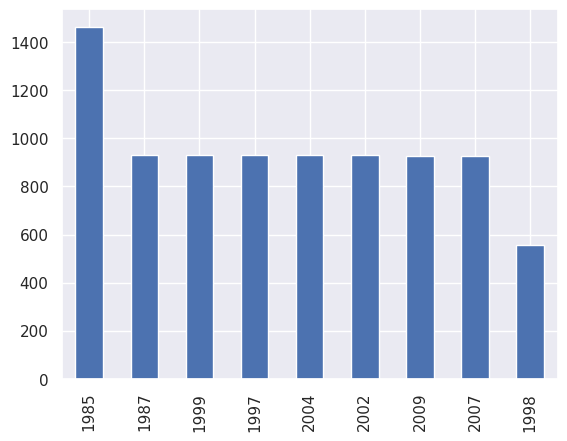

In [ ]:
big_mart['Outlet_Establishment_Year'].value_counts().plot(kind='bar')

**Categorical Features**



**Item_Fat_Content : Count Plot**

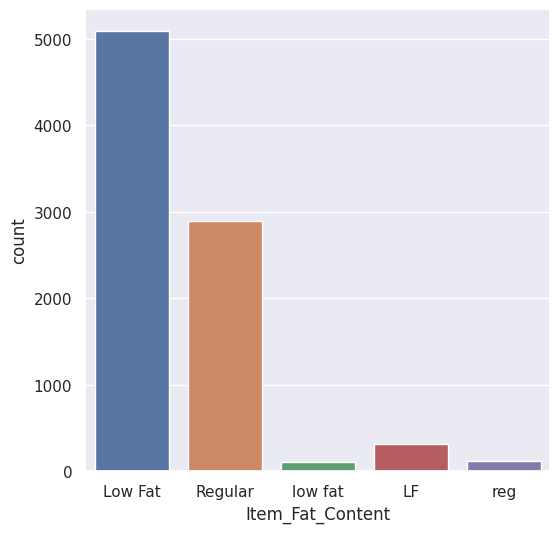

In [ ]:
# Item_Fat_Content
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart)
plt.show()

**Item_Fat_Content : Bar Plot**

<Axes: ylabel='Item_Fat_Content'>

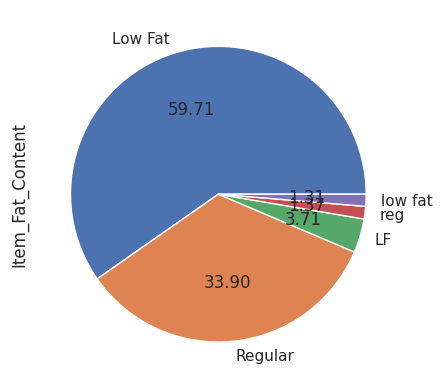

In [ ]:
big_mart['Item_Fat_Content'].value_counts().plot(kind='pie',autopct="%0.2f")

In [ ]:
# Low fat and LF are same >>> we need to put together
# similarly Regular and reg >>> Data cleaning has to be done

### **Item_Type_Column : Count Plot**


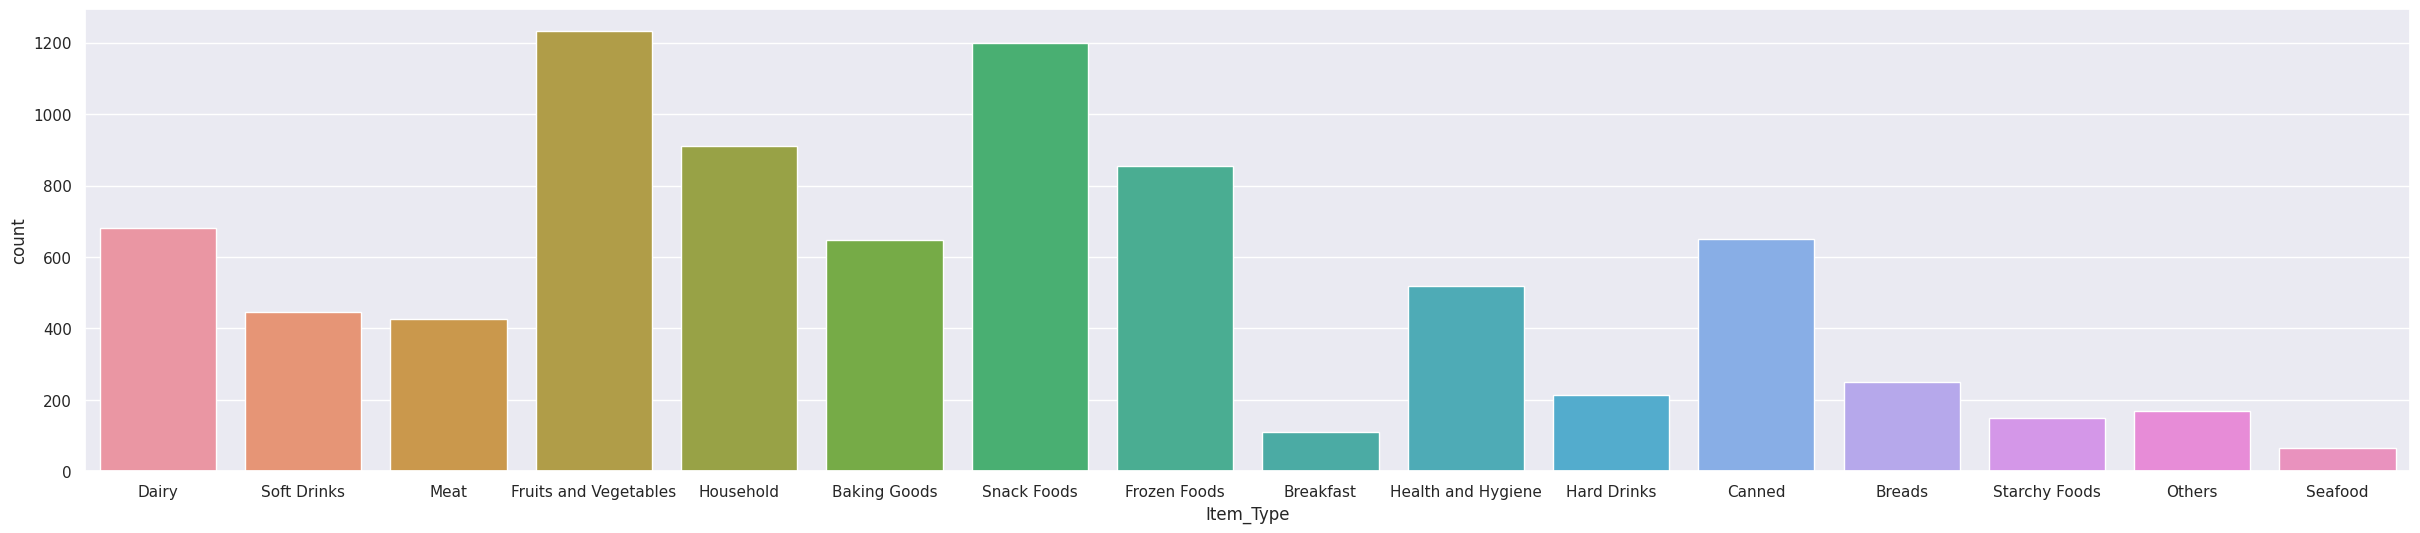

In [ ]:
# Item_Type_Column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=big_mart)
plt.show()

#  **Outlet_Size** : **Count** **Plot**


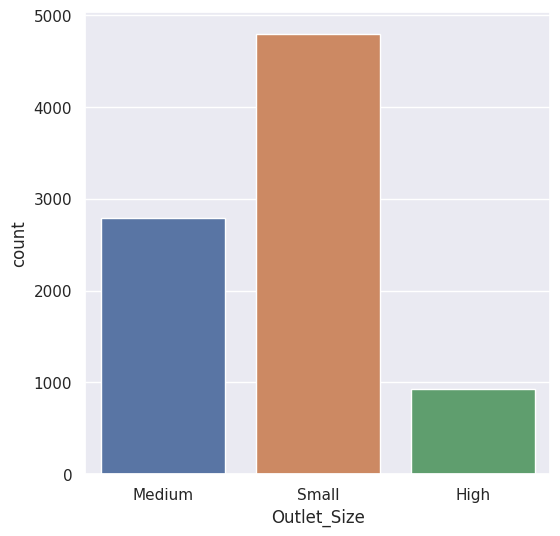

In [ ]:
# Outlet_Size
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=big_mart)
plt.show()

# doubt
# do smilar plots for other colms

# **Data Preprocessing**

In [ ]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
big_mart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# merging colms in same data frame

In [ ]:
big_mart.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
big_mart['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Label** **Encoding**

In [ ]:
encoder = LabelEncoder()

In [ ]:
# cat to num values


big_mart['Item_Identifier'] = encoder.fit_transform(big_mart['Item_Identifier'])

big_mart['Item_Fat_Content'] = encoder.fit_transform(big_mart['Item_Fat_Content'])

big_mart['Item_Type'] = encoder.fit_transform(big_mart['Item_Type'])

big_mart['Outlet_Identifier'] = encoder.fit_transform(big_mart['Outlet_Identifier'])


big_mart['Outlet_Size'] = encoder.fit_transform(big_mart['Outlet_Size'])

big_mart['Outlet_Location_Type'] = encoder.fit_transform(big_mart['Outlet_Location_Type'])

big_mart['Outlet_Type'] = encoder.fit_transform(big_mart['Outlet_Type'])

In [ ]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# **splitting features and targets**

In [ ]:
x = big_mart.drop(columns = 'Item_Outlet_Sales',axis=1)

In [ ]:
y = big_mart['Item_Outlet_Sales']

In [ ]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [ ]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# **splitting data into training data and testing data**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)      # random_state is distribution of data

In [ ]:
x_train.shape

(6818, 11)

In [ ]:
x_test.shape

(1705, 11)

# **Ml Model Training  : XG Boost Regressor**

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(x_train,y_train)   # plots xtrain,ytrain and tries to find pattern

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**Evaluation**
**Prediction on training** **data**

In [ ]:
train_data_pred = regressor.predict(x_train)

R square value

In [ ]:
r2_train = metrics.r2_score(y_train,train_data_pred )

In [ ]:
print('R Squared Value :',r2_train)

R Squared Value : 0.8639680373364909


**Prediction fo**r **testing** **data**

In [ ]:
test_data_pred = regressor.predict(x_test)

In [ ]:
r2_test = metrics.r2_score(y_test,test_data_pred )

In [ ]:
print('R Squared Value :',r2_test)

R Squared Value : 0.5233136709735687
